# Employee Churn Prediction

This is an employee churn prediction model that uses various features given by the HR department to predict employee churn. The dataset is Human Resource from Kaggle.

https://www.kaggle.com/datasets/colara/human-resource

In [1]:
# Basic libraries
import warnings 

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import shap
import gradio as gr

from sklearn.preprocessing import LabelEncoder
from category_encoders import RankHotEncoder
from sklearn.model_selection import train_test_split, learning_curve
from sklearn.metrics import confusion_matrix

pd.set_option('display.max_columns', None)
pd.set_option('future.no_silent_downcasting', True)

plt.style.use('https://github.com/dhaitz/matplotlib-stylesheets/raw/master/pacoty.mplstyle')
plt.rcParams['font.family'] = 'Arial'
sns.set_style('whitegrid')

warnings.filterwarnings('ignore')

%matplotlib inline

In [2]:
df = pd.read_csv('hr_org.csv')

In [3]:
df.head()

,satisfaction_level,last_evaluation,number_project,average_montly_hours,time_spend_company,Work_accident,left,promotion_last_5years,sales,salary
0,0.38,0.53,2,157,3,0,1,0,sales,low
1,0.80,0.86,5,262,6,0,1,0,sales,medium
2,0.11,0.88,7,272,4,0,1,0,sales,medium
3,0.72,0.87,5,223,5,0,1,0,sales,low
4,0.37,0.52,2,159,3,0,1,0,sales,low


In [4]:
df.shape

(14999, 10)

In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 14999 entries, 0 to 14998
Data columns (total 10 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   satisfaction_level     14999 non-null  float64
 1   last_evaluation        14999 non-null  float64
 2   number_project         14999 non-null  int64  
 3   average_montly_hours   14999 non-null  int64  
 4   time_spend_company     14999 non-null  int64  
 5   Work_accident          14999 non-null  int64  
 6   left                   14999 non-null  int64  
 7   promotion_last_5years  14999 non-null  int64  
 8   sales                  14999 non-null  object 
 9   salary                 14999 non-null  object 
dtypes: float64(2), int64(6), object(2)
memory usage: 1.1+ MB


In [6]:
df.describe()

,satisfaction_level,last_evaluation,number_project,average_montly_hours,time_spend_company,Work_accident,left,promotion_last_5years
count,14999.000000,14999.000000,14999.000000,14999.000000,14999.000000,14999.000000,14999.000000,14999.000000
mean,0.612834,0.716102,3.803054,201.050337,3.498233,0.144610,0.238083,0.021268
std,0.248631,0.171169,1.232592,49.943099,1.460136,0.351719,0.425924,0.144281
min,0.090000,0.360000,2.000000,96.000000,2.000000,0.000000,0.000000,0.000000
25%,0.440000,0.560000,3.000000,156.000000,3.000000,0.000000,0.000000,0.000000
50%,0.640000,0.720000,4.000000,200.000000,3.000000,0.000000,0.000000,0.000000
75%,0.820000,0.870000,5.000000,245.000000,4.000000,0.000000,0.000000,0.000000
max,1.000000,1.000000,7.000000,310.000000,10.000000,1.000000,1.000000,1.000000


In [7]:
# Check for NaNs
nan_value = df.isnull().values.any()
nan_result = df.isnull().sum()

print("Any missing values (NaNs):", nan_value)
print("\nCount of missing values (NaNs) for each column:")
print(nan_result)

Any missing values (NaNs): False

Count of missing values (NaNs) for each column:
satisfaction_level       0
last_evaluation          0
number_project           0
average_montly_hours     0
time_spend_company       0
Work_accident            0
left                     0
promotion_last_5years    0
sales                    0
salary                   0
dtype: int64


In [8]:
# Check for 'null' values stored as strings
string_null_value = df.map(lambda x: x == 'null').values.any()
string_null_result = df.map(lambda x: x == 'null').sum()

print("\nAny missing values ('null' strings):", string_null_value)
print("\nCount of missing values ('null' strings) for each column:")
print(string_null_result)


Any missing values ('null' strings): False

Count of missing values ('null' strings) for each column:
satisfaction_level       0
last_evaluation          0
number_project           0
average_montly_hours     0
time_spend_company       0
Work_accident            0
left                     0
promotion_last_5years    0
sales                    0
salary                   0
dtype: int64


In [9]:
# Check for duplicates
duplicate_value = df.duplicated().any()
duplicate_result = df.duplicated().sum()

print("Any duplicate values:", duplicate_value)
print("\nCount of duplicate rows:", duplicate_result)

Any duplicate values: True

Count of duplicate rows: 3008


In [10]:
# Drop duplicate values
df.drop_duplicates(inplace=True)

In [11]:
# Apply preprocessing if needed
df.rename(columns={'sales': 'dept'}, inplace = True)

## EDA

In [12]:
df.head()

,satisfaction_level,last_evaluation,number_project,average_montly_hours,time_spend_company,Work_accident,left,promotion_last_5years,dept,salary
0,0.38,0.53,2,157,3,0,1,0,sales,low
1,0.80,0.86,5,262,6,0,1,0,sales,medium
2,0.11,0.88,7,272,4,0,1,0,sales,medium
3,0.72,0.87,5,223,5,0,1,0,sales,low
4,0.37,0.52,2,159,3,0,1,0,sales,low


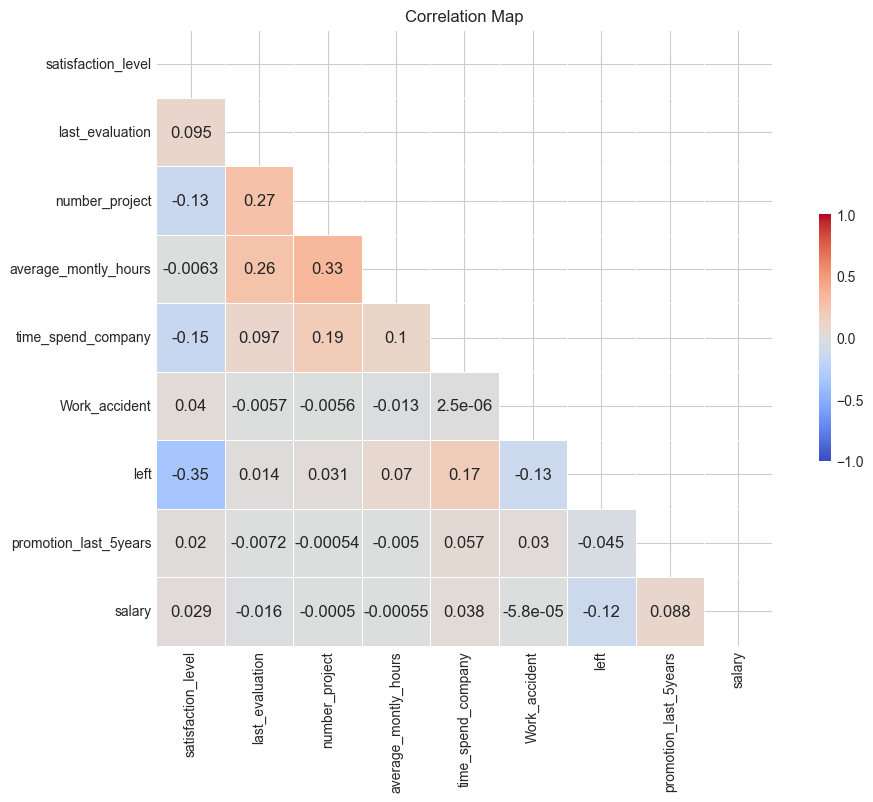

In [13]:
df_corr = df.drop(columns=['dept'])
df_corr['salary'] = df_corr['salary'].map({'low':1, 'medium':2, 'high':3})

corr_matrix = df_corr.corr()

mask = np.zeros_like(corr_matrix, dtype=bool)
mask[np.triu_indices_from(mask)]= True

plt.figure(figsize=(12, 8))

sns.heatmap(corr_matrix,
            mask=mask,
            square=True,
            linewidths=0.5,
            cmap='coolwarm',
            cbar_kws={'shrink': 0.4, 'ticks' : [-1, -.5, 0, 0.5, 1]},
            vmin=-1, 
            vmax=1,
            annot=True,
            annot_kws={'size': 12})

plt.title('Correlation Map')
plt.show()

In [14]:
bins = [0, 0.25, 0.5, 0.75, 1.0]
labels = ['Low', 'Medium', 'High', 'Very High']

df['satisfaction_category'] = pd.cut(df['satisfaction_level'], bins=bins, labels=labels, include_lowest=True)

Checking employees that have left

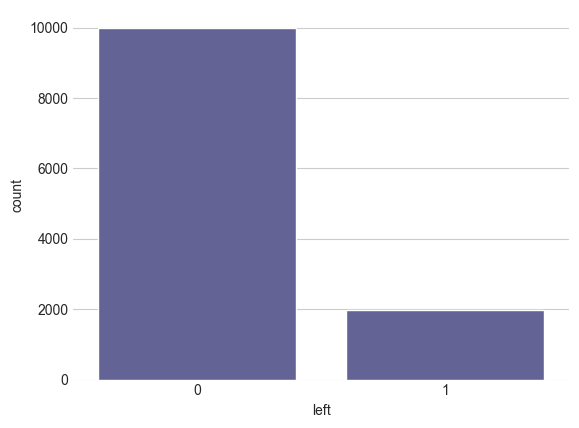

In [15]:
sns.countplot(data=df, x='left')
plt.show()

In [16]:
df['left'].value_counts()

left
0    10000
1     1991
Name: count, dtype: int64

1991 out of 10000 employees left the company; in percentage, 19.91% employees left.

Data is highly imbalanced but let's train the model without applying any resampling techniques first to see how it performs.

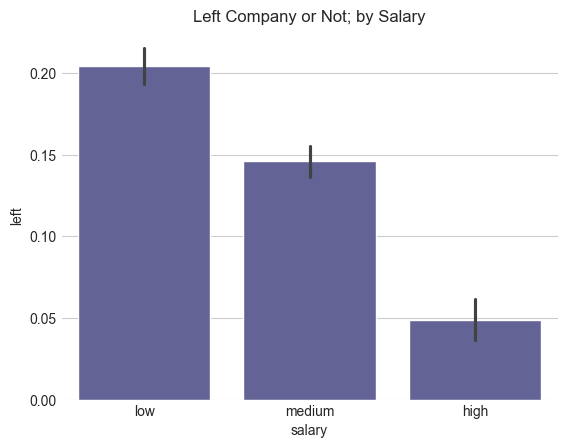

In [17]:
sns.barplot(data=df, x='salary', y='left')

plt.title("Left Company or Not; by Salary")
plt.show()

Employees with low salaries left the most.

In [18]:
left_df = df[df['left'] == 1]

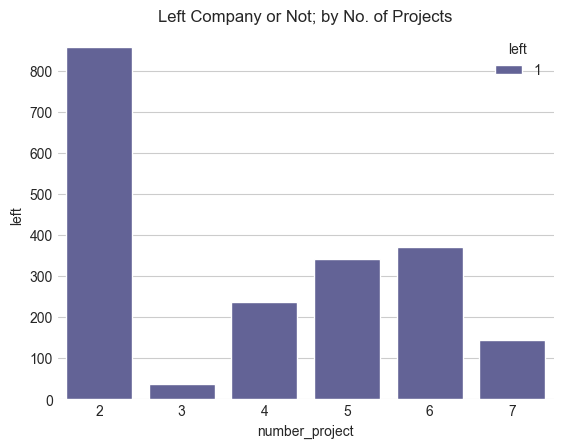

In [19]:
sns.countplot(x='number_project', hue='left', data=left_df)

plt.title("Left Company or Not; by No. of Projects")
plt.ylabel("left")
plt.show()

Employees with 2 projects left the most.

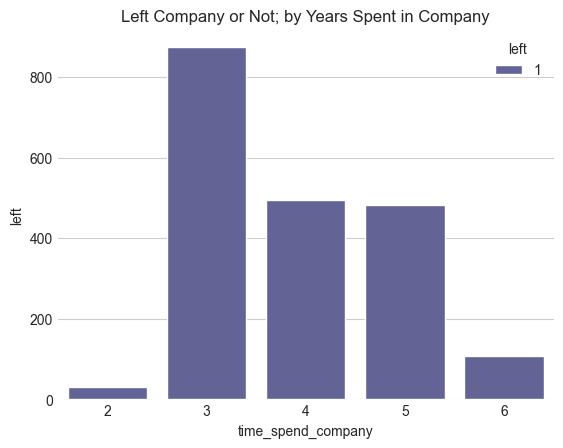

In [20]:
sns.countplot(x='time_spend_company', hue='left', data=left_df)

plt.title("Left Company or Not; by Years Spent in Company")
plt.ylabel("left")
plt.show()

Employees who spent 3 years left the most, followed by those who had spent 4 years.

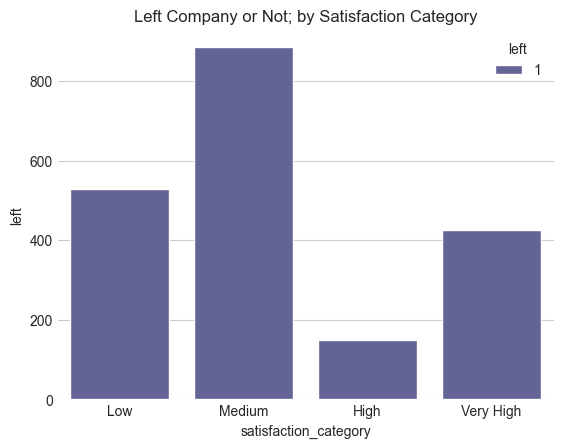

In [21]:
sns.countplot(x='satisfaction_category', hue='left', data=left_df, order=labels)

plt.title("Left Company or Not; by Satisfaction Category")
plt.ylabel("left")
plt.show()

Employees with mediocre satisfaction levels left the most.

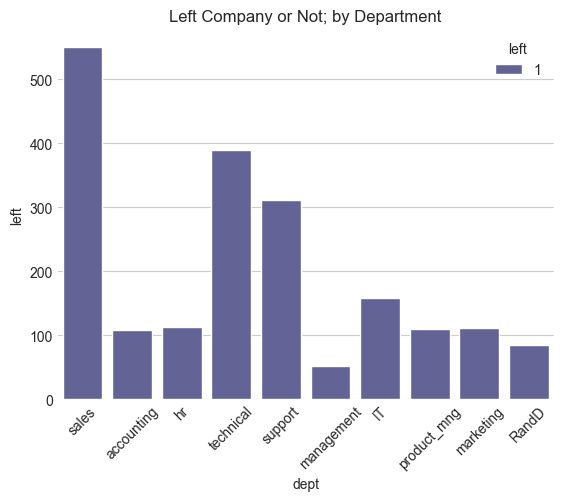

In [22]:
sns.countplot(x='dept', hue='left', data=left_df)

plt.title("Left Company or Not; by Department")
plt.ylabel("left")
plt.xticks(rotation=45)
plt.show()

In [23]:
left_df['dept'].value_counts()

dept
sales          550
technical      390
support        312
IT             158
hr             113
marketing      112
product_mng    110
accounting     109
RandD           85
management      52
Name: count, dtype: int64

Employees from sales department left the most, followed by the technical department.

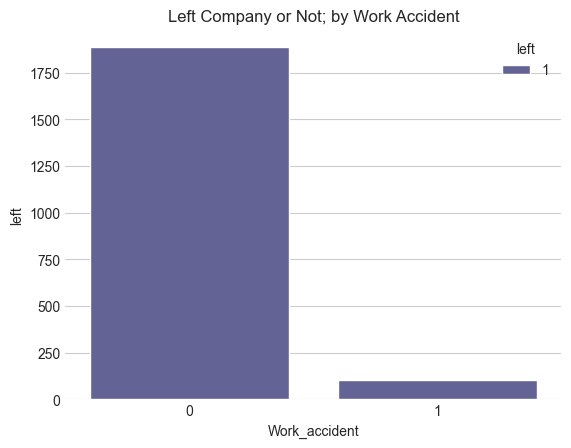

In [24]:
sns.countplot(x='Work_accident', hue='left', data=left_df)

plt.title("Left Company or Not; by Work Accident")
plt.ylabel("left")
plt.show()

Employees involved in work accidents didn't leave.

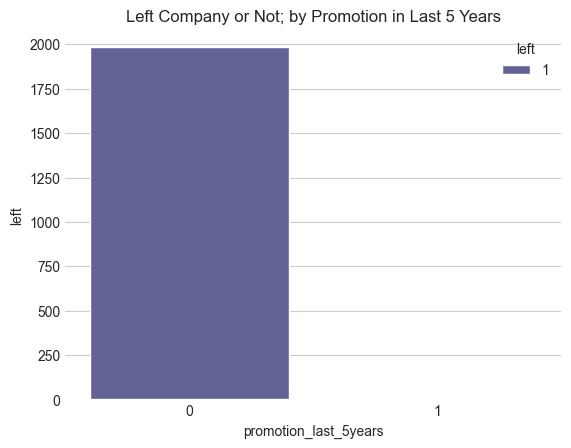

In [25]:
sns.countplot(x='promotion_last_5years', hue='left', data=left_df)

plt.title("Left Company or Not; by Promotion in Last 5 Years")
plt.ylabel("left")
plt.show()

In [26]:
df['promotion_last_5years'].value_counts()

promotion_last_5years
0    11788
1      203
Name: count, dtype: int64

Employees promoted in the last 5 years didn't leave, except for a few which is only 1.69%.

## Machine Learning

In [27]:
df.head()

,satisfaction_level,last_evaluation,number_project,average_montly_hours,time_spend_company,Work_accident,left,promotion_last_5years,dept,salary,satisfaction_category
0,0.38,0.53,2,157,3,0,1,0,sales,low,Medium
1,0.80,0.86,5,262,6,0,1,0,sales,medium,Very High
2,0.11,0.88,7,272,4,0,1,0,sales,medium,Low
3,0.72,0.87,5,223,5,0,1,0,sales,low,High
4,0.37,0.52,2,159,3,0,1,0,sales,low,Medium


In [28]:
df = df.drop(['satisfaction_level', 'last_evaluation'], axis=1)

In [29]:
# Make a copy of DataFrame for later use
df_ui = df.copy()

One-hot encoding "department" and rank-hot encoding "salary" and "satisfaction category" columns. Different encoding types have been used to ensure minimum loss of data.

In [30]:
# One-hot encode the 'dept' column
df = pd.get_dummies(df, columns=['dept'], prefix='dept')

# Rank-hot encode the 'salary' and 'satisfaction category' columns
encoder = RankHotEncoder(cols=['salary', 'satisfaction_category'])
df = encoder.fit_transform(df)

In [31]:
df.head()

,number_project,average_montly_hours,time_spend_company,Work_accident,left,promotion_last_5years,salary_1,salary_2,salary_3,satisfaction_category_1,satisfaction_category_2,satisfaction_category_3,satisfaction_category_4,dept_IT,dept_RandD,dept_accounting,dept_hr,dept_management,dept_marketing,dept_product_mng,dept_sales,dept_support,dept_technical
0,2,157,3,0,1,0,1,1,0,1,1,0,0,False,False,False,False,False,False,False,True,False,False
1,5,262,6,0,1,0,1,1,1,1,1,1,1,False,False,False,False,False,False,False,True,False,False
2,7,272,4,0,1,0,1,1,1,1,0,0,0,False,False,False,False,False,False,False,True,False,False
3,5,223,5,0,1,0,1,1,0,1,1,1,0,False,False,False,False,False,False,False,True,False,False
4,2,159,3,0,1,0,1,1,0,1,1,0,0,False,False,False,False,False,False,False,True,False,False


ML

In [32]:
X = df.drop(['left'], axis=1)
y = df['left']

In [33]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

In [34]:
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier
from sklearn.svm import SVC
from sklearn.neighbors import KNeighborsClassifier
from sklearn.naive_bayes import GaussianNB
from xgboost import XGBClassifier
from lightgbm import LGBMClassifier
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, roc_auc_score, matthews_corrcoef
from alive_progress import alive_it

# Scale data before using in models
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

# Define classifiers
classifiers = {
    'Logistic Regression': LogisticRegression(),
    'Decision Tree': DecisionTreeClassifier(),
    'Random Forest': RandomForestClassifier(),
    'Gradient Boosting': GradientBoostingClassifier(),
    'SVM': SVC(),
    'K-Nearest Neighbors': KNeighborsClassifier(),
    'Naive Bayes': GaussianNB(),
    'XGBoost': XGBClassifier(),
    'LightGBM': LGBMClassifier(verbosity=0)
}

# Define evaluation metrics
metrics = {
    'Accuracy': accuracy_score,
    'Precision (Class 0)': lambda y_true, y_pred: precision_score(y_true, y_pred, pos_label=0),
    'Precision (Class 1)': lambda y_true, y_pred: precision_score(y_true, y_pred, pos_label=1),
    'Recall (Class 0)': lambda y_true, y_pred: recall_score(y_true, y_pred, pos_label=0),
    'Recall (Class 1)': lambda y_true, y_pred: recall_score(y_true, y_pred, pos_label=1),
    'F1-score (Class 0)': lambda y_true, y_pred: f1_score(y_true, y_pred, pos_label=0),
    'F1-score (Class 1)': lambda y_true, y_pred: f1_score(y_true, y_pred, pos_label=1),
    'ROC AUC': roc_auc_score,
    'Matthews correlation coefficient (MCC)': lambda y_true, y_pred: matthews_corrcoef(y_true, y_pred)
}

# Initialize results dictionary
results = {metric: {name: None for name in classifiers} for metric in metrics}

# Evaluate classifiers and store results for each metric
for name, classifier in alive_it(classifiers.items(), force_tty=True, stats="eta: {eta}"):
    classifier.fit(X_train_scaled, y_train)
    y_pred = classifier.predict(X_test_scaled)
    for metric_name, metric_func in metrics.items():
        results[metric_name][name] = metric_func(y_test, y_pred)

# Improve readability of the results
metrics_df = pd.DataFrame(results)
metrics_df = metrics_df.sort_values(by='Matthews correlation coefficient (MCC)', ascending=False)
metrics_df.index.name = 'Algorithm'

metrics_df

|████████████████████████████████████████| 9/9 [100%] in 4.5s (1.59/s)          


,Accuracy,Precision (Class 0),Precision (Class 1),Recall (Class 0),Recall (Class 1),F1-score (Class 0),F1-score (Class 1),ROC AUC,Matthews correlation coefficient (MCC)
Algorithm,,,,,,,,,
LightGBM,0.972207,0.980737,0.928450,0.985977,0.903814,0.983350,0.915966,0.944895,0.899437
XGBoost,0.970261,0.978780,0.926117,0.985643,0.893864,0.982199,0.909705,0.939753,0.892111
Gradient Boosting,0.968316,0.979687,0.910924,0.982304,0.898839,0.980994,0.904841,0.940571,0.885865
Random Forest,0.967204,0.974596,0.927690,0.986311,0.872305,0.980418,0.899145,0.929308,0.880180
Decision Tree,0.956365,0.974900,0.865574,0.972621,0.875622,0.973759,0.870569,0.924121,0.844349
K-Nearest Neighbors,0.944969,0.972307,0.817896,0.961269,0.864013,0.966756,0.840323,0.912641,0.807552
SVM,0.945803,0.965735,0.844595,0.969282,0.829187,0.967505,0.836820,0.899235,0.804378
Naive Bayes,0.804336,0.926312,0.444566,0.831052,0.671642,0.876100,0.535007,0.751347,0.431785
Logistic Regression,0.817121,0.855275,0.411003,0.939232,0.210614,0.895290,0.278509,0.574923,0.199751


We'll use LightGBM as it gives us the best Matthews correlation coefficient and ROC-AUC. These were chosen as the deciding metrics due to the imbalanced nature of the dataset.

In [35]:
# Fit and get predictions
lgb = LGBMClassifier(verbosity=0)
lgb.fit(X_train_scaled, y_train)
y_pred = lgb.predict(X_test_scaled)

In [36]:
# Get metrics and confusion matrix
mcc_score = matthews_corrcoef(y_test, y_pred)
print(f'Matthews correlation coefficient (MCC): {mcc_score:.4f}')

roc_auc = roc_auc_score(y_test, y_pred)
print(f'\nROC-AUC Score: {roc_auc:.4f}')

print('\nConfusion Matrix:')
print(confusion_matrix(y_test, y_pred))

Matthews correlation coefficient (MCC): 0.8994

ROC-AUC Score: 0.9449

Confusion Matrix:
[[2953   42]
 [  58  545]]


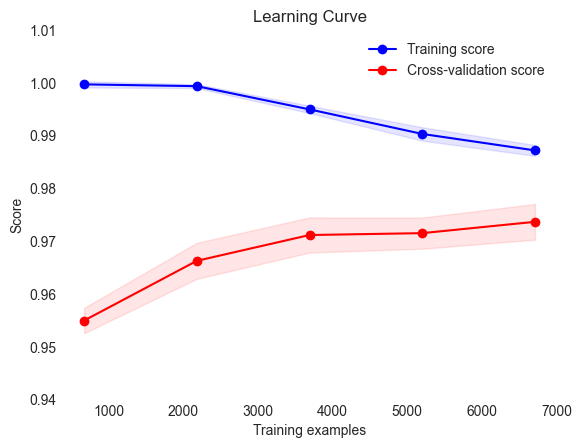

In [37]:
def plot_learning_curve(estimator, title, X, y, ylim=None, cv=None, n_jobs=-1, train_sizes=np.linspace(.1, 1.0, 5)):
    plt.figure()
    plt.title(title)
    if ylim is not None:
        plt.ylim(*ylim)
    plt.xlabel("Training examples")
    plt.ylabel("Score")
    train_sizes, train_scores, test_scores = learning_curve(
        estimator, X, y, cv=cv, n_jobs=n_jobs, train_sizes=train_sizes)
    train_scores_mean = np.mean(train_scores, axis=1)
    train_scores_std = np.std(train_scores, axis=1)
    test_scores_mean = np.mean(test_scores, axis=1)
    test_scores_std = np.std(test_scores, axis=1)
    plt.grid()

    plt.fill_between(train_sizes, train_scores_mean - train_scores_std,
                     train_scores_mean + train_scores_std, alpha=0.1,
                     color="b")
    plt.fill_between(train_sizes, test_scores_mean - test_scores_std,
                     test_scores_mean + test_scores_std, alpha=0.1, color="r")
    plt.plot(train_sizes, train_scores_mean, 'o-', color="b",
             label="Training score")
    plt.plot(train_sizes, test_scores_mean, 'o-', color="r",
             label="Cross-validation score")

    plt.legend(loc="best")
    plt.ylim(0.94, 1.01)

    return plt

plot_learning_curve(lgb, "Learning Curve", X_train_scaled, y_train, cv=5, n_jobs=-1)
plt.show()

Cross-valdiating the model with 10 folds. As the MCC isn't an official scorer, we can "make it" using the make_scorer function.

In [38]:
from sklearn.model_selection import cross_val_score
from sklearn.metrics import make_scorer

# Define the MCC scorer
scorer = make_scorer(matthews_corrcoef)

# Perform k-fold cross-validation
scores = cross_val_score(lgb, X_train_scaled, y_train, cv=10, scoring=scorer)
print("Matthews correlation coefficient for 10 folds:", scores.mean())

Matthews correlation coefficient for 10 folds: 0.9032034058987752


As the model is not underfitting or overfitting, it can be used for predictions.

Using SHAP to check important features in model.

PermutationExplainer explainer: 3599it [01:43, 32.69it/s]                          


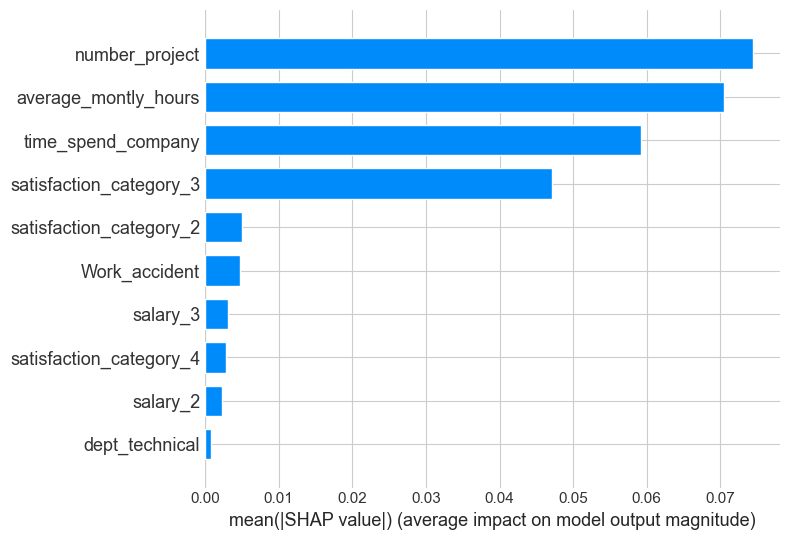

In [39]:
explainer = shap.Explainer(lgb.predict, X_test_scaled)
shap_values = explainer.shap_values(X_test_scaled)
shap.summary_plot(shap_values, X, max_display=10, plot_type="bar")

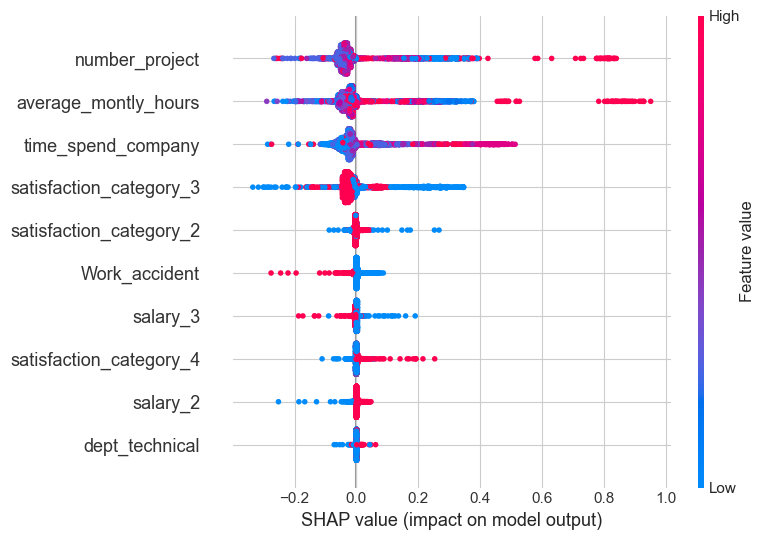

In [40]:
# Use feature names of X as X_test_scaled is now an array
feature_names = X.columns.tolist()
shap.summary_plot(shap_values, X_test_scaled, max_display=10, feature_names=feature_names)

Using the model on real-life data example

In [41]:
X.head()

,number_project,average_montly_hours,time_spend_company,Work_accident,promotion_last_5years,salary_1,salary_2,salary_3,satisfaction_category_1,satisfaction_category_2,satisfaction_category_3,satisfaction_category_4,dept_IT,dept_RandD,dept_accounting,dept_hr,dept_management,dept_marketing,dept_product_mng,dept_sales,dept_support,dept_technical
0,2,157,3,0,0,1,1,0,1,1,0,0,False,False,False,False,False,False,False,True,False,False
1,5,262,6,0,0,1,1,1,1,1,1,1,False,False,False,False,False,False,False,True,False,False
2,7,272,4,0,0,1,1,1,1,0,0,0,False,False,False,False,False,False,False,True,False,False
3,5,223,5,0,0,1,1,0,1,1,1,0,False,False,False,False,False,False,False,True,False,False
4,2,159,3,0,0,1,1,0,1,1,0,0,False,False,False,False,False,False,False,True,False,False


Data sample

<center>

| Employee | Number of Projects | Average Monthly Hours | Time Spent in Company | Work Accident | Promotion in 5 Years | Salary | Satisfaction Level | Department |
|:--------:|:------------------:|:---------------------:|:----------------------:|:------------:|:--------------------:|:------:|:------------------:|:----------:|
|    1     |          3          |          210          |           4            |       0       |           1          |   3    |          3          |     IT     |
|    2     |          1          |          160          |           2            |       1       |           0          |   2    |          2          |    R&D     |
|    3     |          5          |          240          |           6            |       0       |           1          |   3    |          4          | Management |

</center>

In [42]:
# Manually input all data to get predictions
employee_check = [[3, 210, 4, 0, 1, 1, 1, 1, 1, 1, 1, 0, True, False, False, False, False, False, False, False, False, False],
                  [1, 160, 2, 1, 0, 1, 1, 0, 1, 1, 0, 0, False, True, False, False, False, False, False, False, False, False],
                  [5, 240, 6, 0, 1, 1, 1, 1, 1, 1, 1, 1,  False, False, False, False, False, False, True, False, False, False]]

for i, prediction in enumerate(lgb.predict(employee_check)):
    print(f"Predicted outcome for Employee {i+1} is: {prediction}")

Predicted outcome for Employee 1 is: 0
Predicted outcome for Employee 2 is: 1
Predicted outcome for Employee 3 is: 0


NOTE: A Gradio GUI is run locally, so it won't show up if I run it and upload the notebook. If you want to view and use the UI, please download the notebook and run the code blocks after this. 😊

GUI using Gradio

In [ ]:
# Recall raw DataFrame to use for GUI
df = df_ui

# Encode columns as needed
df = pd.get_dummies(df, columns=['dept'], prefix='dept')
encoder = LabelEncoder()
df['salary'] = encoder.fit_transform(df['salary'])
df['satisfaction_category'] = encoder.fit_transform(df['satisfaction_category'])

# Split into train and test
X = df.drop(['left'], axis=1)
y = df['left']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

# Scale data before using in models
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

# Fit model
lgb = LGBMClassifier(verbosity=0)
lgb.fit(X_train_scaled, y_train)
y_pred = lgb.predict(X_test_scaled)

In [ ]:
def predict_employee_churn(number_project, average_montly_hours, time_spend_company,
                            Work_accident, promotion_last_5years, salary, satisfaction_category,
                            department):
    # Prepare input data for prediction
    department_columns = [column for column in df.columns if column.startswith('dept')]
    input_data = np.array([[number_project, average_montly_hours, time_spend_company,
                            Work_accident, promotion_last_5years, salary, satisfaction_category] +
                            [1 if dept == department else 0 for dept in department_columns]])
    
    # Scale input data
    scaled_input_data = scaler.fit_transform(input_data)

    # Make prediction
    prediction = lgb.predict(scaled_input_data)
    
    return f"Employee Churn Prediction: {prediction[0]}"


# Get list of departments
departments = [column.split('_')[1] for column in df.columns if column.startswith('dept_')]

# Define Gradio inputs
inputs = [
    gr.Dropdown(choices=(["1", "2", "3", "4", "5", "6", "7"]), label="Number of Projects"),
    gr.Number(minimum=70, maximum=350, label="Average Monthly Hours", info="Min hours: 70 and Max hours: 350"),
    gr.Number(minimum=1, maximum=12, label="Years Spent in Company", info="Min years: 1 and Max years: 12"),
    gr.Dropdown(choices=[("No", 0), ("Yes", 1)], label="Work Accident"),
    gr.Dropdown(choices=[("No", 0), ("Yes", 1)], label="Promotion in Last 5 Years"),
    gr.Dropdown(choices=[("Low", 1), ("Medium", 2), ("High", 3)], label="Salary"),
    gr.Dropdown(choices=[("Low", 1), ("Medium", 2), ("High", 3), ("Very High", 4)], label="Satisfaction Category"),
    gr.Dropdown(choices=["IT", "R&D", "Accounting", "HR", "Management", 
                         "Marketing", "Product Management", "Sales",
                         "Support", "Technical"],
                       label="Department")
]

demo = gr.Interface(fn=predict_employee_churn, inputs=inputs, outputs="text", title="Employee Churn Prediction",
    examples = [
        ["3", 210, 4, ("No", 0), ("Yes", 1), ("High", 3), ("High", 3), "IT"],
        ["1", 160, 2, ("Yes", 1), ("No", 0), ("Medium", 2), ("Medium", 2), "R&D"],
        ["5", 240, 6, ("No", 0), ("Yes", 1), ("High", 3), ("Very High", 4), "Management"]
        ]
)

demo.launch()